In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../Data/pl_stats.csv").sort_values(by='Rk', axis=0)

In [3]:
squad_names=data['Squad']

In [4]:
def_pressing_stats = ['Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err']

In [5]:
data_pressing = data.loc[:,def_pressing_stats]

In [6]:
shot_goal_creation_stats = ['SCA','SCA90','GCA','GCA90']

In [7]:
possession_stats = ['Poss','90s','Touches','Def Pen','Def 3rd','Mid 3rd','Att 3rd','Att Pen','Live','Att','Succ','Succ%','Tkld','Tkld%','Carries','TotDist','PrgDist','PrgC','1/3','CPA','Mis','Dis','Rec','PrgR']

In [8]:
data_possession = data.loc[:,possession_stats]

In [9]:
data_pressing.columns, data_possession.columns

(Index(['Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl', 'Att', 'Tkl%',
        'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err'],
       dtype='object'),
 Index(['Poss', '90s', 'Touches', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd',
        'Att Pen', 'Live', 'Att', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries',
        'TotDist', 'PrgDist', 'PrgC', '1/3', 'CPA', 'Mis', 'Dis', 'Rec',
        'PrgR'],
       dtype='object'))

In [10]:
data_pressing_possession = data_pressing.merge(data_possession).set_index(squad_names)

In [11]:
data_pressing_possession.index

Index(['Manchester City', 'Arsenal', 'Manchester Utd', 'Newcastle Utd',
       'Liverpool', 'Brighton', 'Aston Villa', 'Tottenham', 'Brentford',
       'Fulham', 'Crystal Palace', 'Chelsea', 'Wolves', 'West Ham',
       'Bournemouth', 'Nott'ham Forest', 'Everton', 'Leicester City',
       'Leeds United', 'Southampton'],
      dtype='object', name='Squad')

In [12]:
data_pressing_possession_corr = data_pressing_possession.corr()

<Axes: >

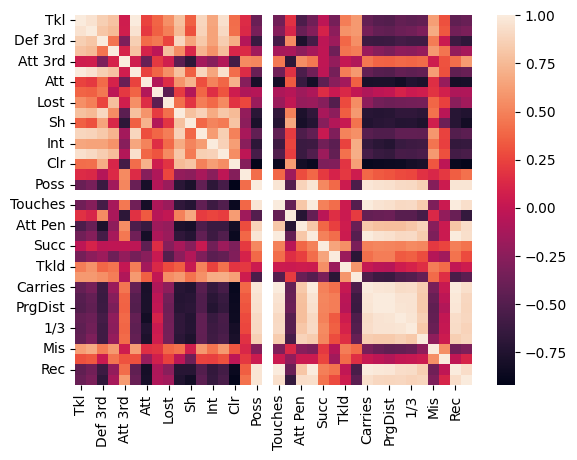

In [13]:
sns.heatmap(data_pressing_possession_corr)

In [14]:
data_pressing_possession_corr = data_pressing_possession_corr[abs(data_pressing_possession_corr)>0.65]

In [15]:
data_pressing_possession_corr.index

Index(['Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl', 'Att', 'Tkl%',
       'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Poss',
       '90s', 'Touches', 'Def Pen', 'Att Pen', 'Live', 'Succ', 'Succ%', 'Tkld',
       'Tkld%', 'Carries', 'TotDist', 'PrgDist', 'PrgC', '1/3', 'CPA', 'Mis',
       'Dis', 'Rec', 'PrgR'],
      dtype='object')

In [16]:
# columns = data_pressing_possession_corr["is_fraud"][abs(data_pressing_possession_corr["is_fraud"])>0.001].index

# sns.pairplot(data_pressing_possession.loc[:,data_pressing_possession_corr.index])

In [17]:
correlated_features = data_pressing_possession_corr.loc[def_pressing_stats,possession_stats]

Text(0.5, 1.0, 'Correlation between Team pressing and Possession')

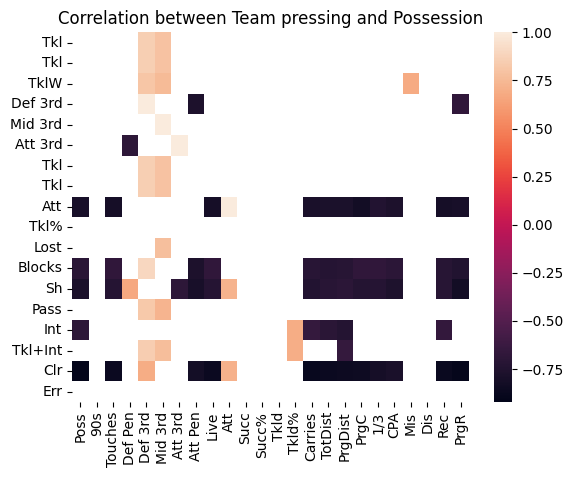

In [18]:
sns.heatmap(correlated_features)
plt.title("Correlation between Team pressing and Possession")

In [19]:
#columns = data_pressing_possession_corr["is_fraud"][abs(data_pressing_possession_corr["is_fraud"])>0.001].index

#sns.pairplot(data_pressing_possession)

In [20]:
correlated_features_df = correlated_features.stack().index
correlated_features_df=pd.DataFrame(correlated_features_df)

correlated_features_df

,0
0,"(Tkl, Def 3rd)"
1,"(Tkl, Mid 3rd)"
2,"(Tkl, Def 3rd)"
3,"(Tkl, Mid 3rd)"
4,"(TklW, Def 3rd)"
...,...
79,"(Clr, PrgC)"
80,"(Clr, 1/3)"
81,"(Clr, CPA)"
82,"(Clr, Rec)"


Plot function

In [21]:
def plot_data(df, y_cols):
    for i in y_cols:
        plt.figure()
        plt.xticks(rotation=90)
        plt.bar(df.index,df[i],label=i)
        plt.legend()
        plt.plot()

In [22]:
# def plot_data(df, y_cols):
#     plt.figure(figsize=(10, 6))  # Set figure size (optional)
#     plt.xticks(rotation=90)
#     width = 0.2  # Width of each bar (adjust as needed)
#     num_bars = len(y_cols)
#     num_points = len(df.index)
    
#     # Get the x-axis labels
#     x_labels = df.index.tolist()
    
#     # Calculate positions for bars
#     total_width = width * num_bars
#     offset = total_width * (num_points - 1) / (2 * num_points)

#     for idx, col in enumerate(y_cols):
#         # Offset each group of bars
#         x_positions = [pos + idx * total_width - offset + width * i for i, pos in enumerate(range(num_points))]
#         plt.bar(x_positions, df[col], width=width, label=col)

#     plt.xticks(range(num_points), x_labels)  # Set x-axis labels
#     plt.legend()
#     plt.show()

In [23]:
# plot_data(data_pressing_possession, poss_press_stats)

In [24]:
# sns.heatmap(data_pressing_possession_corr.loc[['Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err'],'Poss'])

In [25]:
poss_press_stats=data_pressing_possession_corr.loc[['Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err'],'Poss'].dropna().index

[]

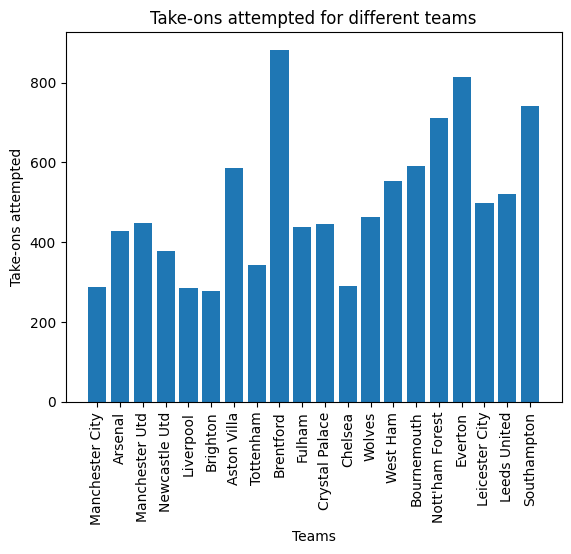

In [26]:
plt.figure()
plt.xticks(rotation=90)
plt.bar(data_pressing_possession.index,data_pressing_possession['Att'])
plt.title("Take-ons attempted for different teams")
plt.ylabel("Take-ons attempted")
plt.xlabel("Teams")
plt.plot()

[]

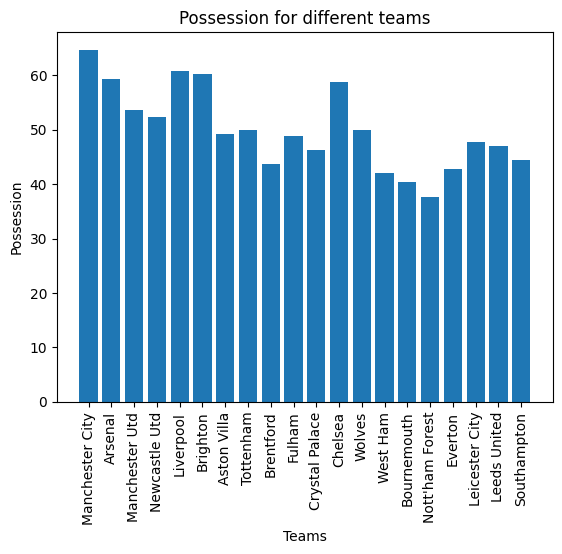

In [27]:
plt.figure()
plt.xticks(rotation=90)
plt.bar(data_pressing_possession.index,data_pressing_possession['Poss'])
plt.title("Possession for different teams")
plt.ylabel("Possession")
plt.xlabel("Teams")
plt.plot()

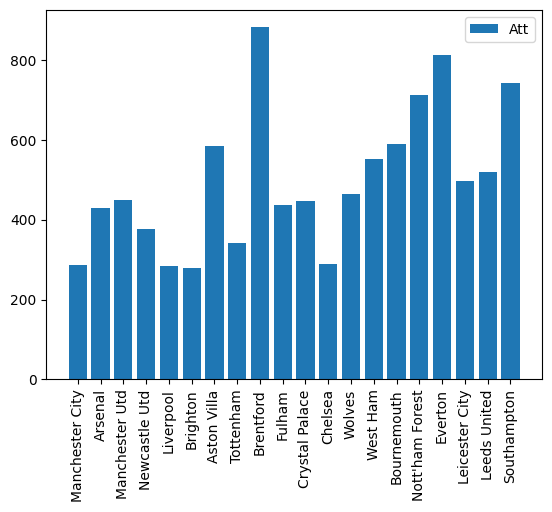

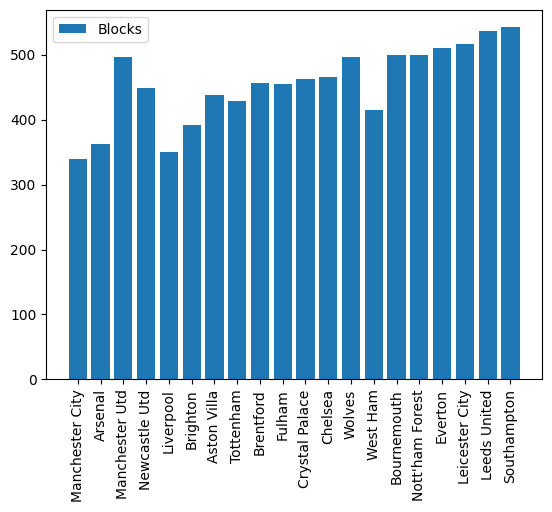

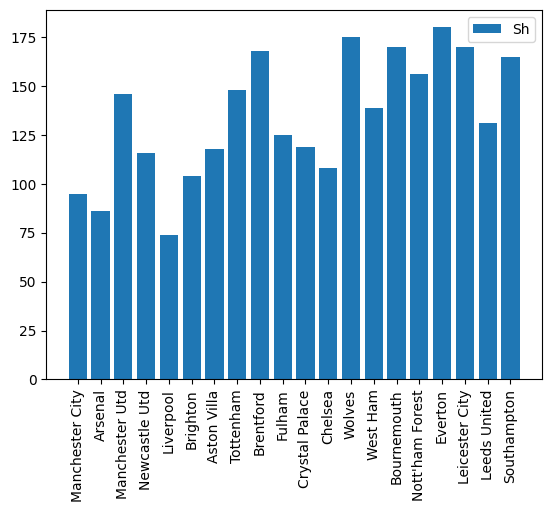

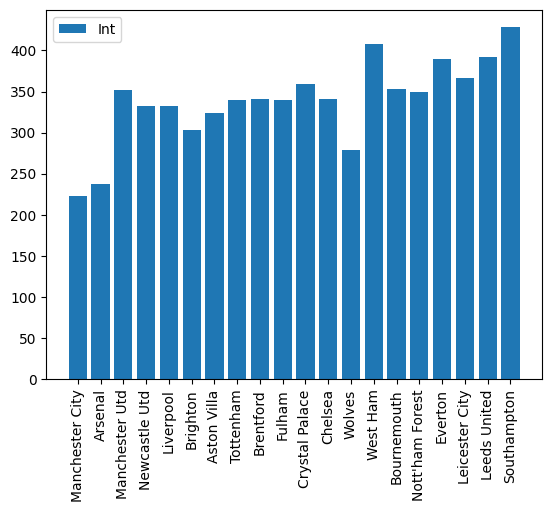

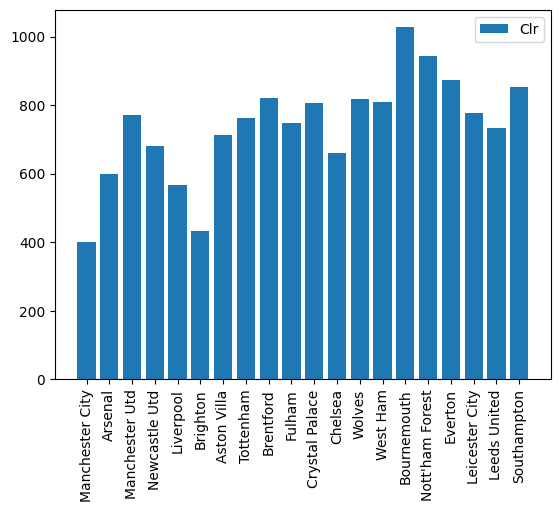

In [28]:
plot_data(data_pressing_possession, poss_press_stats)

In [29]:
dispossessed_press_stats=data_pressing_possession_corr.loc[['Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err'],'Dis'].dropna().index

In [30]:
# plot_data(data_pressing_possession, dispossessed_press_stats)
# plt.ylabel("Take-ons attempted")
# plt.show()

In [31]:
prog_carry_dist_press_stats=data_pressing_possession_corr.loc[['Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err'],'PrgDist'].dropna().index

In [32]:
# df = data_pressing_possession

# # Plotting
# fig, ax = plt.subplots()

# # Number of bars per group
# num_bars = len(df.columns)

# # Width of each bar
# width = 0.3

# # Centering each group of bars
# index = np.arange(len(df.index))

# # Plot each group of bars
# for i, column in enumerate(df.columns):
#     ax.bar(index + (i - num_bars / 2) * width, df[poss_press_stats], width, label=poss_press_stats)

# # Additional plot configurations
# ax.set_xlabel('Category')
# ax.set_ylabel('Values')
# ax.set_title('Multiple Bar Plots')
# ax.set_xticks(index)
# ax.set_xticklabels(df.index)
# ax.legend()

# plt.show()

In [33]:
# plot_data(data_pressing_possession, prog_carry_dist_presprog_carry_dist_press_statss_stats)
# plt.ylabel("Take-ons attempted")
# plt.show()

In [34]:
prog_pass_rec_press_stats=data_pressing_possession_corr.loc[['Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err'],'PrgR'].dropna().index

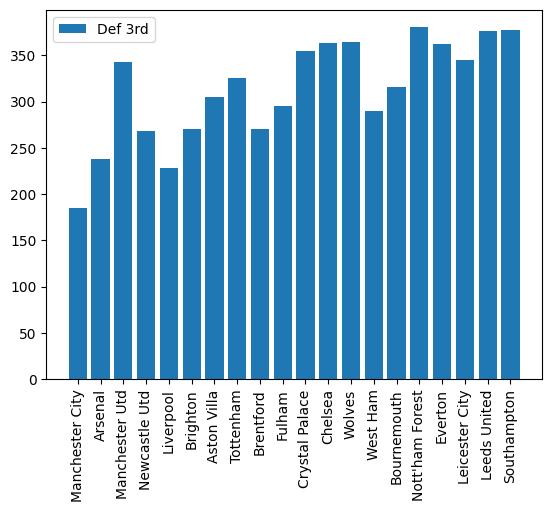

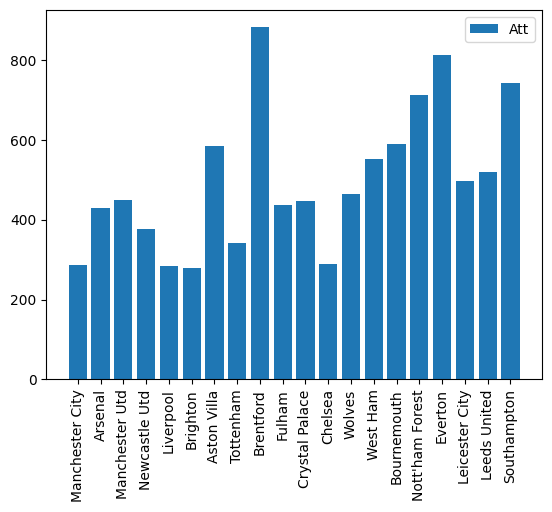

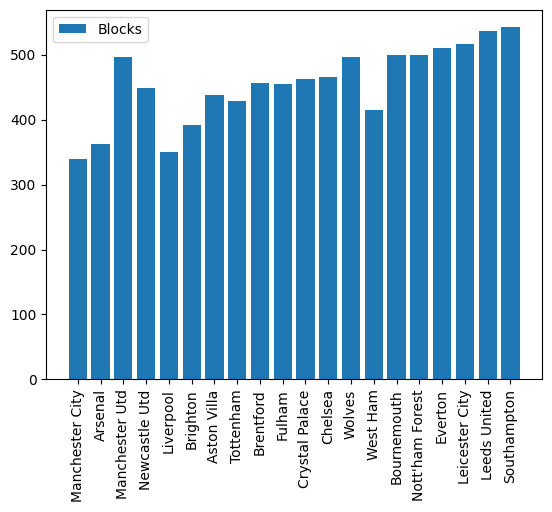

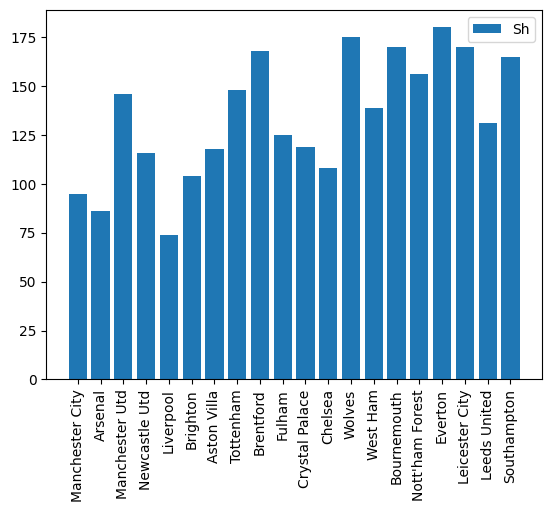

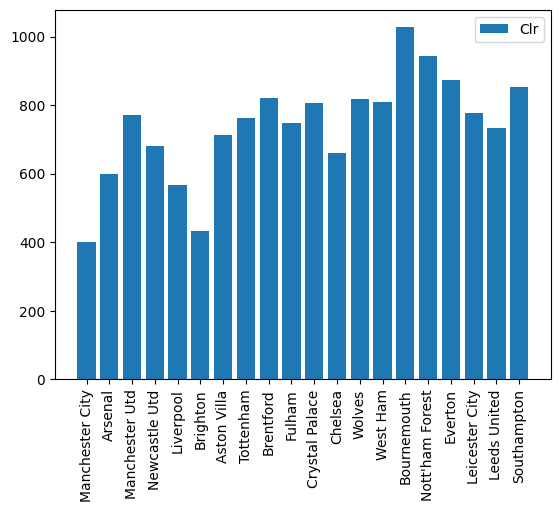

In [35]:
plot_data(data_pressing_possession, prog_pass_rec_press_stats)

The total distance covered by the team indicates the amount of pressing performed by the team

In [39]:
sns.set(style='dark', palette='deep')

[]

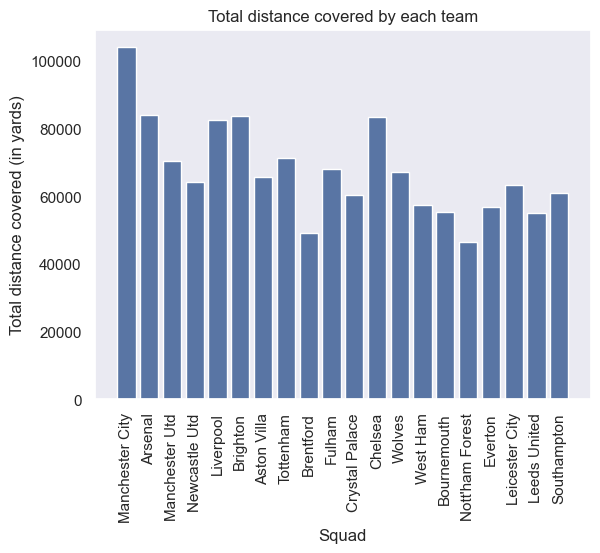

In [42]:
sns.barplot(x=data_pressing_possession.index, y=data_pressing_possession['TotDist'])
plt.xticks(rotation=90)
plt.ylabel("Total distance covered (in yards)")
# plt.legend()
plt.title("Total distance covered by each team")
plt.plot()
# plot_data(data_pressing_possession, ['TotDist'])

Let us plot the data to confirm that Machester City's distance covered is an anomaly

[]

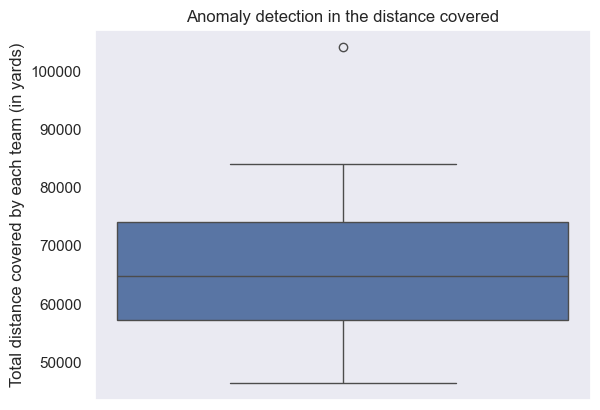

In [41]:
sns.boxplot(y=data_pressing_possession['TotDist'])
plt.title("Anomaly detection in the distance covered")
plt.ylabel("Total distance covered by each team (in yards)")
plt.plot()